<center> <h1> Selecting the best GAN architecture (tunning parameters)</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

In [1]:
from utilities import EdwinRueda_utils
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_svgs
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource, FactorRange
%matplotlib inline
output_notebook()
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

Loading BokehJS ...

tensorflow version:  2.3.1
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.23.2


In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [3]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [4]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


In [5]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### bulding the best GAN architecture

In [6]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(50, input_shape=(noise_shape,)))
G.add(Dense(150))
G.add(Dropout(.15))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(32, input_shape=(rg_data.shape[1],)))
D.add(tf.keras.layers.LeakyReLU(alpha=.2))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

In [7]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[ 0.8272322   0.61709035 -0.65311556  0.73364889  0.34335027  0.90652312
  -0.74440251 -0.76294829  0.37739729]
 [ 0.21174183  0.6317338  -0.95173648 -0.07013906 -0.81042237 -0.7995749
  -0.09173262 -0.10127047 -0.03215783]
 [-0.69635674  0.61522057  0.25595572  0.45099435 -0.02338216  0.61590452
   0.76072734 -0.7404652   0.63911979]
 [ 0.13794634 -0.13824028 -0.22661215  0.97275385 -0.64926898 -0.96457409
  -0.55403593  0.50512162 -0.93426915]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.42167171],
       [0.53319746],
       [0.67047706],
       [0.45848099]])>

In [8]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1700
optimizerG = tf.optimizers.SGD(lr=.00015, momentum=.92, decay=.00015/epochs)
optimizerD = tf.optimizers.SGD(lr=.001, momentum=.9, decay=.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD, verbose=False)

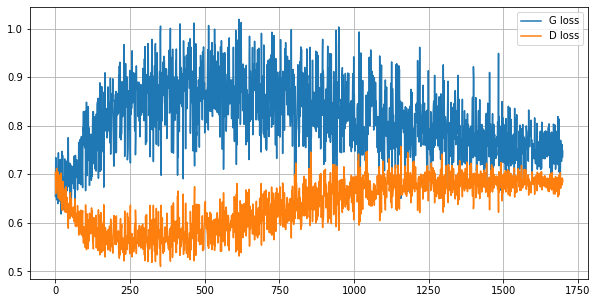

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

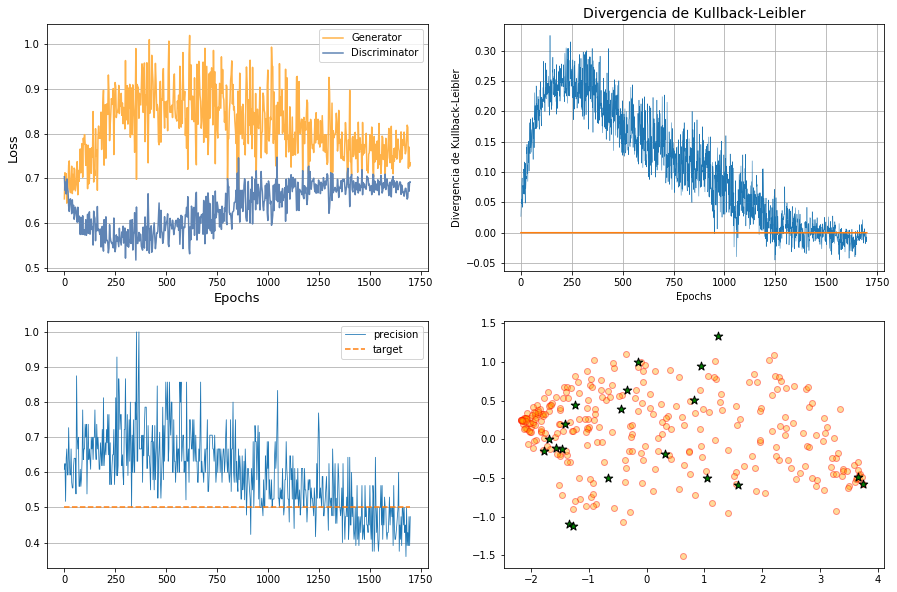

In [10]:
r = gan_utils.plot_results(syn_size=300);

In [11]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

precision, kld, loss_g, loss_d, s_metric =  gan_utils.get_metrics(num_iter=200)
[pl, pq1, pq2, pq3, pu], pouts = bokeh_utils.boxtplot_values(np.array(precision), True, True)
[kl, kq1, kq2, kq3, ku], kouts = bokeh_utils.boxtplot_values(np.array(kld), True, True)
[gl, gq1, gq2, gq3, gu], gouts = bokeh_utils.boxtplot_values(np.array(loss_g), True, True)
[dl, dq1, dq2, dq3, du], douts = bokeh_utils.boxtplot_values(np.array(loss_d), True, True)

In [12]:
cats = ["precision", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl, kl, gl, dl], width=.2, height=.001, line_color="black")
p.segment(cats, [pl, kl, gl, dl], cats, [pq1, kq1, gq1, dq1], line_color="black")
p.vbar(cats, width=.4, top=[pq2, kq2, gq2, dq2], bottom=[pq1, kq1, gq1, dq1], fill_color="#3B8686",
       line_color="black")
p.vbar(cats, width=.4, top=[pq3, kq3, gq3, dq3], bottom=[pq2, kq2, gq2, dq2], fill_color="#E08E79",
      line_color="black")
p.segment(cats, [pq3, kq3, gq3, dq3], cats, [pu, ku, gu, du], line_color="black")
p.rect(cats, [pu, ku, gu, du], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts, kouts, gouts, douts]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

### The baseline architecture is the architecture used to qualify

In [13]:
noise_shape = 50
num_syn_samples = 3

### architecture #1

In [14]:
#Generator network
G1 = Sequential()
G1.add(Dense(50, input_shape=(noise_shape,)))
G1.add(Dense(150))
G1.add(Dropout(.15))
G1.add(Dense(9, activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G1(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[-0.00970718, -0.02037428,  0.01531097, -0.00793717,  0.04870609,
         0.05986025,  0.0113847 , -0.04231612,  0.017929  ],
       [ 0.05556658,  0.03714558,  0.03213407, -0.05463341,  0.00203031,
        -0.07654468,  0.02402449, -0.07755478, -0.01786264],
       [-0.1434532 ,  0.11671709, -0.03967626,  0.06060553,  0.02825673,
         0.009385  ,  0.04872284,  0.05520251, -0.02301309]])>

In [15]:
#Discriminator network
D1 = Sequential()
D1.add(Dense(32, input_shape=(rg_data.shape[1],)))
D1.add(tf.keras.layers.LeakyReLU(alpha=.2))
D1.add(Dense(32))
D1.add(Dense(1, activation="sigmoid"))
print("output of the disriminator network:")
D1(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.51099941],
       [0.49117181],
       [0.51498578]])>

In [16]:
rg_data.shape

(20, 9)

In [17]:
num_iterations = 40
epochs = 1700
precision1, kld1, loss_g1, loss_d1, s_metric_1 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D1.get_weights():
        init_weights.append(init(w.shape))
    D1.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G1.get_weights():
        init_weights.append(init(w.shape))
    G1.set_weights(init_weights)    
    
    gan_utils1 = EdwinRueda_utils.gan_utils()
    optimizerG1 = tf.optimizers.SGD(lr=.00015, momentum=.92, decay=.00015/epochs)
    optimizerD1 = tf.optimizers.SGD(lr=.001, momentum=.9, decay=.001/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils1.train(rg_data, G1, D1, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG1, optimizerD=optimizerD1,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils1.get_metrics(num_iter=50)
    precision1.append(np.mean(precision))
    kld1.append(np.mean(kld))
    loss_g1.append(np.mean(loss_g))
    loss_d1.append(np.mean(loss_d))
    s_metric_1.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

iteration: 0, time: 17.915302991867065 [s]
iteration: 1, time: 16.981099843978882 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 2, time: 16.476757287979126 [s]
iteration: 3, time: 16.58470582962036 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 4, time: 16.770643949508667 [s]
iteration: 5, time: 16.61080241203308 [s]
iteration: 6, time: 16.35059690475464 [s]
iteration: 7, time: 17.546704292297363 [s]
iteration: 8, time: 16.4230318069458 [s]
iteration: 9, time: 16.2965886592865 [s]
iteration: 10, time: 16.61968159675598 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 11, time: 18.864482164382935 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 12, time: 17.7018404006958 [s]
iteration: 13, time: 19.348718643188477 [s]
iteration: 14, time: 17.007930278778076 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 15, time: 16.356870651245117 [s]
iteration: 16, time: 16.564287424087524 [s]
iteration: 17, time: 16.39988613128662 [s]
iteration: 18, time: 17.13715958595276 [s]
iteration: 19, time: 18.311729192733765 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 20, time: 16.465529680252075 [s]
iteration: 21, time: 16.486796855926514 [s]
iteration: 22, time: 17.652848482131958 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 23, time: 18.900352001190186 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 24, time: 19.06992220878601 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 25, time: 17.077911615371704 [s]
iteration: 26, time: 17.88053274154663 [s]
iteration: 27, time: 16.232835054397583 [s]
iteration: 28, time: 17.526191473007202 [s]
iteration: 29, time: 17.32476544380188 [s]
iteration: 30, time: 17.661105394363403 [s]
iteration: 31, time: 18.117676258087158 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 32, time: 18.3644917011261 [s]
iteration: 33, time: 19.5820574760437 [s]
iteration: 34, time: 17.666579961776733 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 35, time: 18.749572277069092 [s]
iteration: 36, time: 17.451820135116577 [s]
iteration: 37, time: 18.10989236831665 [s]
iteration: 38, time: 18.279497146606445 [s]
iteration: 39, time: 17.743300914764404 [s]


### Metric to select the best GAN architecture
$$ S(x, x')=\sum_{i}^{m}\sum_{j}^{n_g}\sum_{k}^{n_f}\frac{\vert x_{i}^{(k)}- x_{j}^{'(k)}\vert}{n_f n_g m} + \frac{\beta}{n_g}\sum_{l}^{n_g}{(D(x)- 0.5})^2$$
- where $\beta$ is a parameter of adjustment, $x$ are the real samples and $x'$ are the synthetics samples.

In [18]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

[pl_1, pq1_1, pq2_1, pq3_1, pu_1], pouts_1 = bokeh_utils.boxtplot_values(np.array(precision1), True, True)
[kl_1, kq1_1, kq2_1, kq3_1, ku_1], kouts_1 = bokeh_utils.boxtplot_values(np.array(kld1), True, True)
[gl_1, gq1_1, gq2_1, gq3_1, gu_1], gouts_1 = bokeh_utils.boxtplot_values(np.array(loss_g1), True, True)
[dl_1, dq1_1, dq2_1, dq3_1, du_1], douts_1 = bokeh_utils.boxtplot_values(np.array(loss_d1), True, True)
[sl_1, sq1_1, sq2_1, sq3_1, su_1], souts_1 = bokeh_utils.boxtplot_values(np.array(s_metric), True, True)

In [19]:
cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_1, sl_1, kl_1, gl_1, dl_1], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_1, sl_1, kl_1, gl_1, dl_1], cats, [pq1_1, sq1_1, kq1_1, gq1_1, dq1_1], line_color="black")
p.vbar(cats, width=.4, top=[pq2_1, sq2_1, kq2_1, gq2_1, dq2_1], bottom=[pq1_1, sq1_1, kq1_1, gq1_1, dq1_1],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_1, sq3_1, kq3_1, gq3_1, dq3_1], bottom=[pq2_1, sq2_1, kq2_1, gq2_1, dq2_1],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_1, sq3_1, kq3_1, gq3_1, dq3_1], cats, [pu_1, su_1, ku_1, gu_1, du_1], line_color="black")
p.rect(cats, [pu_1, su_1, ku_1, gu_1, du_1], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_1, souts_1, kouts_1, gouts_1, douts_1]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [20]:
np.save(file="./results/selecting_gan/precision_1.npy", arr=np.array(precision1))
np.save(file="./results/selecting_gan/kld_1.npy", arr=np.array(kld1))
np.save(file="./results/selecting_gan/loss_g_1.npy", arr=np.array(loss_g1))
np.save(file="./results/selecting_gan/loss_d_1.npy", arr=np.array(loss_d1))
np.save(file="./results/selecting_gan/s_metric_1.npy", arr=np.array(s_metric_1))

### architecture #2

In [21]:
#Generator network
G2 = Sequential()
G2.add(Dense(noise_shape, input_shape=(noise_shape,)))
G2.add(Dropout(.1))
G2.add(Dense(70))
G2.add(Dropout(.15))
G2.add(Dense(20))
G2.add(Dense(rg_data.shape[1], activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G2(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[-0.03118609,  0.02147422,  0.04179733,  0.07195827,  0.0020187 ,
         0.05349814, -0.08285626, -0.02031899,  0.06568548],
       [ 0.05759525, -0.00447454,  0.0036939 , -0.11556746,  0.03121957,
        -0.03442698, -0.09712296,  0.03559381,  0.02476145],
       [-0.09710625,  0.11547666,  0.0560928 , -0.11073014,  0.02092508,
        -0.07874455,  0.06713521,  0.11587979,  0.03769438]])>

In [22]:
D2 = Sequential()
D2.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D2.add(Dense(9, activation="relu"))
D2.add(Dense(30, activation="relu"))
D2.add(Dense(9, activation="relu"))
D2.add(Dense(1, activation="sigmoid"))

print("output of the disriminator network:")
D2(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.4986966 ],
       [0.49806598],
       [0.5029122 ]])>

In [23]:
num_iterations = 40
epochs = 1400
precision2, kld2, loss_g2, loss_d2, s_metric_2 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D2.get_weights():
        init_weights.append(init(w.shape))
    D2.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G2.get_weights():
        init_weights.append(init(w.shape))
    G2.set_weights(init_weights)    
    
    gan_utils2 = EdwinRueda_utils.gan_utils()
    optimizerG2 = tf.optimizers.SGD(lr=.0008, momentum=.75, decay=.0008/epochs)
    optimizerD2 = tf.optimizers.SGD(lr=.003, momentum=.7, decay=.003/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils2.train(rg_data, G2, D2, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG2, optimizerD=optimizerD2,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils2.get_metrics(num_iter=50)
    precision2.append(np.mean(precision))
    kld2.append(np.mean(kld))
    loss_g2.append(np.mean(loss_g))
    loss_d2.append(np.mean(loss_d))
    s_metric_2.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

iteration: 0, time: 15.78994870185852 [s]
iteration: 1, time: 20.270339012145996 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 2, time: 16.212932348251343 [s]
iteration: 3, time: 14.578373908996582 [s]
iteration: 4, time: 16.530001640319824 [s]
iteration: 5, time: 18.120309114456177 [s]
iteration: 6, time: 16.766380310058594 [s]
iteration: 7, time: 16.85332155227661 [s]
iteration: 8, time: 16.950510263442993 [s]
iteration: 9, time: 18.174967050552368 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 10, time: 16.898591995239258 [s]
iteration: 11, time: 17.39335536956787 [s]
iteration: 12, time: 17.245839595794678 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 13, time: 17.25039267539978 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 14, time: 17.18546152114868 [s]
iteration: 15, time: 17.116070985794067 [s]
iteration: 16, time: 17.06137490272522 [s]
iteration: 17, time: 16.849440336227417 [s]
iteration: 18, time: 17.115572452545166 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 19, time: 16.914684295654297 [s]
iteration: 20, time: 17.483943700790405 [s]
iteration: 21, time: 17.533249139785767 [s]
iteration: 22, time: 16.987677812576294 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 23, time: 16.982563257217407 [s]
iteration: 24, time: 17.067027807235718 [s]
iteration: 25, time: 16.964027166366577 [s]
iteration: 26, time: 17.086499214172363 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 27, time: 17.37674045562744 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 28, time: 17.21467614173889 [s]
iteration: 29, time: 17.10519552230835 [s]
iteration: 30, time: 17.159626007080078 [s]
iteration: 31, time: 16.854219913482666 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 32, time: 18.015494108200073 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 33, time: 16.89996886253357 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 34, time: 18.16295862197876 [s]
iteration: 35, time: 17.191219091415405 [s]
iteration: 36, time: 16.566202640533447 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 37, time: 16.274611711502075 [s]
iteration: 38, time: 16.33761239051819 [s]
iteration: 39, time: 16.931947231292725 [s]


In [26]:
[pl_2, pq1_2, pq2_2, pq3_2, pu_2], pouts_2 = bokeh_utils.boxtplot_values(np.array(precision2), True, True)
[kl_2, kq1_2, kq2_2, kq3_2, ku_2], kouts_2 = bokeh_utils.boxtplot_values(np.array(kld2), True, True)
[gl_2, gq1_2, gq2_2, gq3_2, gu_2], gouts_2 = bokeh_utils.boxtplot_values(np.array(loss_g2), True, True)
[dl_2, dq1_2, dq2_2, dq3_2, du_2], douts_2 = bokeh_utils.boxtplot_values(np.array(loss_d2), True, True)
[sl_2, sq1_2, sq2_2, sq3_2, su_2], souts_2 = bokeh_utils.boxtplot_values(np.array(s_metric_2), True, True)

cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_2, sl_2, kl_2, gl_2, dl_2], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_2, sl_2, kl_2, gl_2, dl_2], cats, [pq1_2, sq1_2, kq1_2, gq1_2, dq1_2], line_color="black")
p.vbar(cats, width=.4, top=[pq2_2, sq2_2, kq2_2, gq2_2, dq2_2], bottom=[pq1_2, sq1_2, kq1_2, gq1_2, dq1_2],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_2, sq3_2, kq3_2, gq3_2, dq3_2], bottom=[pq2_2, sq2_2, kq2_2, gq2_2, dq2_2],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_2, sq3_2, kq3_2, gq3_2, dq3_2], cats, [pu_2, su_2, ku_2, gu_2, du_2], line_color="black")
p.rect(cats, [pu_2, su_2, ku_2, gu_2, du_2], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_2, souts_2, kouts_2, gouts_2, douts_2]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

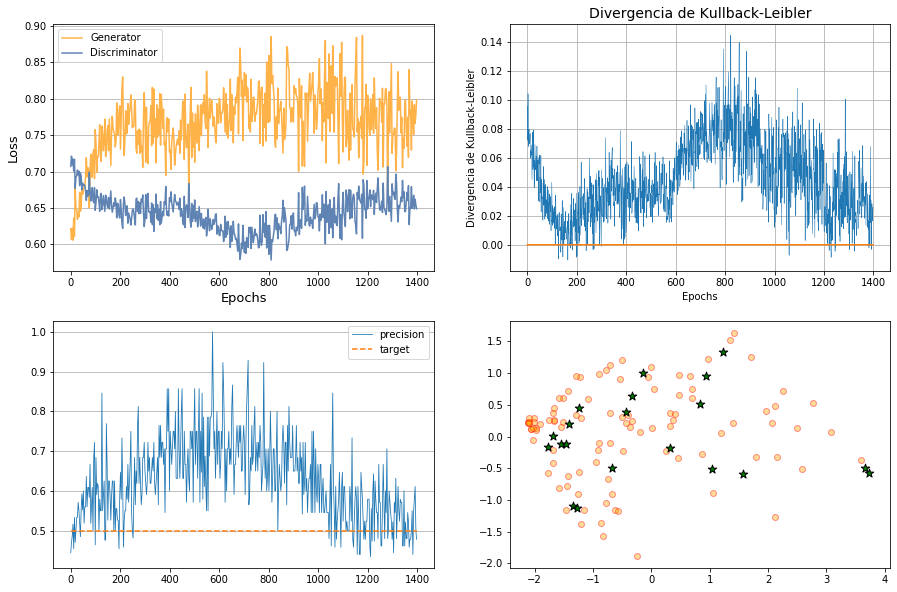

In [27]:
r = gan_utils2.plot_results(syn_size=100);

In [28]:
np.save(file="./results/selecting_gan/precision_2.npy", arr=np.array(precision2))
np.save(file="./results/selecting_gan/kld_2.npy", arr=np.array(kld2))
np.save(file="./results/selecting_gan/loss_g_2.npy", arr=np.array(loss_g2))
np.save(file="./results/selecting_gan/loss_d_2.npy", arr=np.array(loss_d2))
np.save(file="./results/selecting_gan/s_metric_2.npy", arr=np.array(s_metric_2))

### architecture #3

In [29]:
#generator network
G3 = Sequential()
G3.add(Dense(noise_shape, input_shape=(noise_shape,), activation="tanh"))
G3.add(Dropout(.1))
G3.add(Dense(50))
G3.add(Dropout(.1))
G3.add(Dense(rg_data.shape[1], activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G3(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[-0.01355663, -0.12139327, -0.04562813, -0.04191618, -0.06281871,
         0.12183372,  0.03669263,  0.01269686,  0.07423594],
       [-0.08768309,  0.07254437, -0.0072583 ,  0.06964042,  0.00516115,
        -0.06637249,  0.07232626,  0.07252558, -0.08872855],
       [ 0.00894268,  0.05721302, -0.09953349,  0.10756742,  0.02221672,
        -0.00026646, -0.01423672,  0.01188312, -0.00040251]])>

In [30]:
#discriminator networks
D3 = Sequential()
D3.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],), activation="tanh"))
D3.add(tf.keras.layers.LeakyReLU(.2))
D3.add(Dense(16))
D3.add(tf.keras.layers.LeakyReLU(.2))
D3.add(Dense(8))
D3.add(Dense(1, activation="sigmoid"))

print("output of the disriminator network:")
D3(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.49535154],
       [0.50695763],
       [0.50509526]])>

In [31]:
gan_utils3 = EdwinRueda_utils.gan_utils()
optimizerG3 = tf.optimizers.SGD(lr=.00013, momentum=.95, decay=.00013/epochs)
optimizerD3 = tf.optimizers.SGD(lr=.001, momentum=.92, decay=.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils3.train(rg_data, G3, D3, noise_input=noise_shape,
                                                   epochs=epochs, batch_size=rg_data.shape[0],
                                                   optimizerG=optimizerG3, optimizerD=optimizerD3,
                                                   verbose=False)

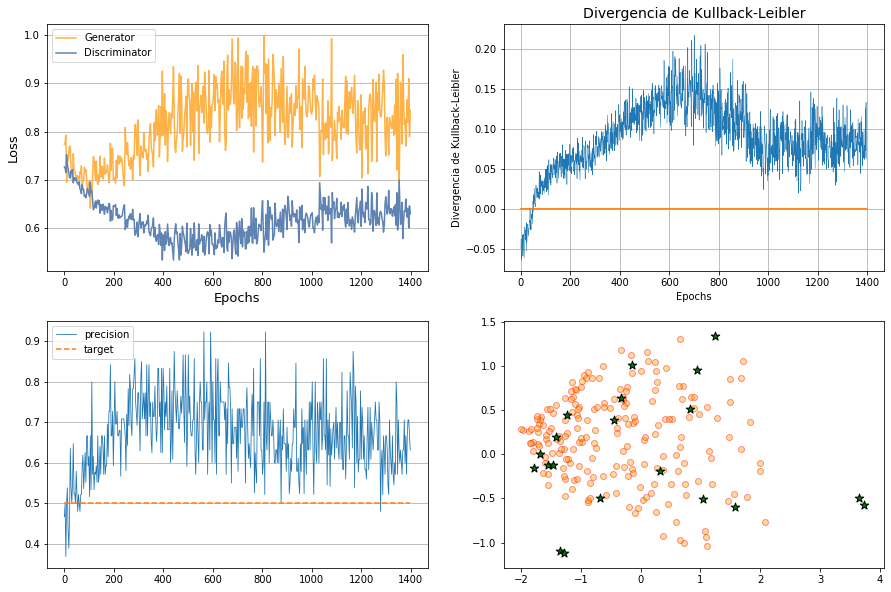

In [32]:
f = gan_utils3.plot_results(200)

In [33]:
epochs = 1700
precision3, kld3, loss_g3, loss_d3, s_metric_3 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D3.get_weights():
        init_weights.append(init(w.shape))
    D3.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G3.get_weights():
        init_weights.append(init(w.shape))
    G3.set_weights(init_weights)    
    
    gan_utils3 = EdwinRueda_utils.gan_utils()
    optimizerG3 = tf.optimizers.SGD(lr=.00013, momentum=.95, decay=.00013/epochs)
    optimizerD3 = tf.optimizers.SGD(lr=.001, momentum=.92, decay=.001/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils3.train(rg_data, G3, D3, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG3, optimizerD=optimizerD3,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils3.get_metrics(num_iter=50)
    precision3.append(np.mean(precision))
    kld3.append(np.mean(kld))
    loss_g3.append(np.mean(loss_g))
    loss_d3.append(np.mean(loss_d))
    s_metric_3.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

iteration: 0, time: 17.701176404953003 [s]
iteration: 1, time: 16.941351890563965 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 2, time: 16.823193788528442 [s]
iteration: 3, time: 16.820783853530884 [s]
iteration: 4, time: 17.00709557533264 [s]
iteration: 5, time: 17.364330291748047 [s]
iteration: 6, time: 19.21814727783203 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 7, time: 18.57567858695984 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 8, time: 19.400615453720093 [s]
iteration: 9, time: 19.631850004196167 [s]
iteration: 10, time: 19.206229209899902 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 11, time: 18.985984563827515 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 12, time: 18.035948991775513 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 13, time: 17.69474983215332 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 14, time: 17.746433973312378 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 15, time: 18.03429937362671 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 16, time: 18.7206928730011 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 17, time: 20.634883880615234 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 18, time: 18.1749005317688 [s]
iteration: 19, time: 18.415613412857056 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 20, time: 18.458458423614502 [s]
iteration: 21, time: 17.783589363098145 [s]
iteration: 22, time: 18.565330028533936 [s]
iteration: 23, time: 18.481087923049927 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 24, time: 18.577125787734985 [s]
iteration: 25, time: 18.41166663169861 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 26, time: 18.1368191242218 [s]
iteration: 27, time: 21.045789003372192 [s]
iteration: 28, time: 19.489141941070557 [s]
iteration: 29, time: 19.88669991493225 [s]
iteration: 30, time: 18.195538997650146 [s]
iteration: 31, time: 18.877487421035767 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 32, time: 18.948873281478882 [s]
iteration: 33, time: 18.532057285308838 [s]
iteration: 34, time: 18.67188286781311 [s]
iteration: 35, time: 18.949222326278687 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 36, time: 21.782241582870483 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 37, time: 19.180838108062744 [s]
iteration: 38, time: 19.9211847782135 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 39, time: 17.81915855407715 [s]


In [34]:
[pl_3, pq1_3, pq2_3, pq3_3, pu_3], pouts_3 = bokeh_utils.boxtplot_values(np.array(precision3), True, True)
[kl_3, kq1_3, kq2_3, kq3_3, ku_3], kouts_3 = bokeh_utils.boxtplot_values(np.array(kld3), True, True)
[gl_3, gq1_3, gq2_3, gq3_3, gu_3], gouts_3 = bokeh_utils.boxtplot_values(np.array(loss_g3), True, True)
[dl_3, dq1_3, dq2_3, dq3_3, du_3], douts_3 = bokeh_utils.boxtplot_values(np.array(loss_d3), True, True)
[sl_3, sq1_3, sq2_3, sq3_3, su_3], souts_3 = bokeh_utils.boxtplot_values(np.array(s_metric_3), True, True)

cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_3, sl_3, kl_3, gl_3, dl_3], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_3, sl_3, kl_3, gl_3, dl_3], cats, [pq1_3, sq1_3, kq1_3, gq1_3, dq1_3], line_color="black")
p.vbar(cats, width=.4, top=[pq2_3, sq2_3, kq2_3, gq2_3, dq2_3], bottom=[pq1_3, sq1_3, kq1_3, gq1_3, dq1_3],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_3, sq3_3, kq3_3, gq3_3, dq3_3], bottom=[pq2_3, sq2_3, kq2_3, gq2_3, dq2_3],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_3, sq3_3, kq3_3, gq3_3, dq3_3], cats, [pu_3, su_3, ku_3, gu_3, du_3], line_color="black")
p.rect(cats, [pu_3, su_3, ku_3, gu_3, du_3], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_3, souts_3, kouts_3, gouts_3, douts_3]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

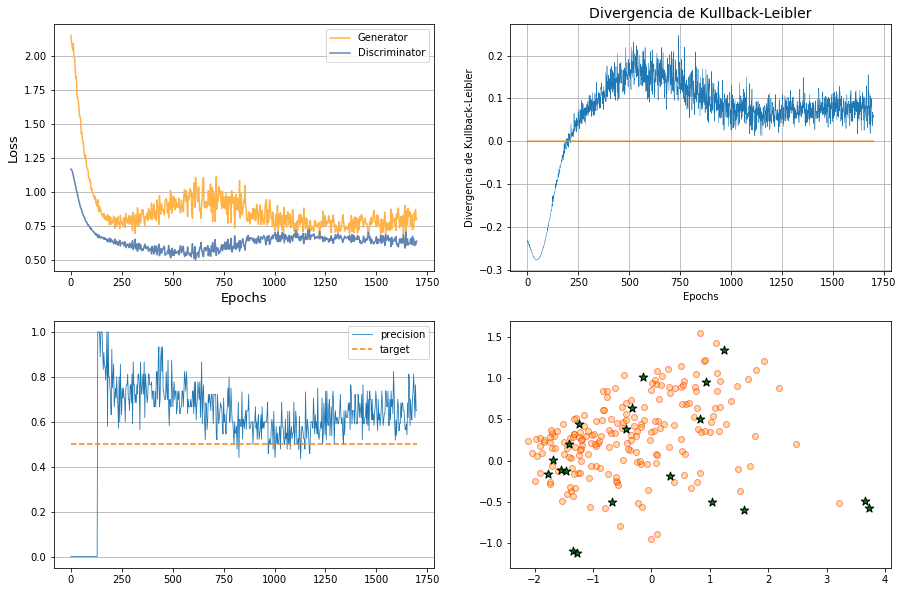

In [42]:
f = gan_utils3.plot_results(200)

In [35]:
np.save(file="./results/selecting_gan/precision_3.npy", arr=np.array(precision3))
np.save(file="./results/selecting_gan/kld_3.npy", arr=np.array(kld3))
np.save(file="./results/selecting_gan/loss_g_3.npy", arr=np.array(loss_g3))
np.save(file="./results/selecting_gan/loss_d_3.npy", arr=np.array(loss_d3))
np.save(file="./results/selecting_gan/s_metric_3.npy", arr=np.array(s_metric_3))

### Comparing the architectures

In [2]:
#architecture #1
precision_1 = np.load("./results/selecting_gan/precision_1.npy")
kld_1 = np.load("./results/selecting_gan/kld_1.npy")
loss_g_1 = np.load("./results/selecting_gan/loss_g_1.npy")
loss_d_1 = np.load("./results/selecting_gan/loss_d_1.npy")
s_metric_1 = np.load("./results/selecting_gan/s_metric_1.npy")

#architecture #2
precision_2 = np.load("./results/selecting_gan/precision_2.npy")
kld_2 = np.load("./results/selecting_gan/kld_2.npy")
loss_g_2 = np.load("./results/selecting_gan/loss_g_2.npy")
loss_d_2 = np.load("./results/selecting_gan/loss_d_2.npy")
s_metric_2 = np.load("./results/selecting_gan/s_metric_2.npy")

#architecture #3
precision_3 = np.load("./results/selecting_gan/precision_3.npy")
kld_3 = np.load("./results/selecting_gan/kld_3.npy")
loss_g_3 = np.load("./results/selecting_gan/loss_g_3.npy")
loss_d_3 = np.load("./results/selecting_gan/loss_d_3.npy")
s_metric_3 = np.load("./results/selecting_gan/s_metric_3.npy")

In [3]:
factors = []
for i in ["Architecture 1", "Architecture 2", "Architecture 3"]:
    factors.append((i, "Precision"))
    factors.append((i, "KLD"))
    factors.append((i, "Loss G"))
    factors.append((i, "loss D"))
    factors.append((i, "S metric"))

In [4]:
from utilities.EdwinRueda_utils import bokeh_utils

bokeh_utils = bokeh_utils()

[pl_1, pq1_1, pq2_1, pq3_1, pu_1], pouts_1 = bokeh_utils.boxtplot_values(precision_1, True, True)
[kl_1, kq1_1, kq2_1, kq3_1, ku_1], kouts_1 = bokeh_utils.boxtplot_values(np.array(kld_1), True, True)
[gl_1, gq1_1, gq2_1, gq3_1, gu_1], gouts_1 = bokeh_utils.boxtplot_values(np.array(loss_g_1), True, True)
[dl_1, dq1_1, dq2_1, dq3_1, du_1], douts_1 = bokeh_utils.boxtplot_values(np.array(loss_d_1), True, True)
[sl_1, sq1_1, sq2_1, sq3_1, su_1], souts_1 = bokeh_utils.boxtplot_values(np.array(s_metric_1), True, True)

#2
[pl_2, pq1_2, pq2_2, pq3_2, pu_2], pouts_2 = bokeh_utils.boxtplot_values(np.array(precision_2), True, True)
[kl_2, kq1_2, kq2_2, kq3_2, ku_2], kouts_2 = bokeh_utils.boxtplot_values(np.array(kld_2), True, True)
[gl_2, gq1_2, gq2_2, gq3_2, gu_2], gouts_2 = bokeh_utils.boxtplot_values(np.array(loss_g_2), True, True)
[dl_2, dq1_2, dq2_2, dq3_2, du_2], douts_2 = bokeh_utils.boxtplot_values(np.array(loss_d_2), True, True)
[sl_2, sq1_2, sq2_2, sq3_2, su_2], souts_2 = bokeh_utils.boxtplot_values(np.array(s_metric_2), True, True)

#3
[pl_3, pq1_3, pq2_3, pq3_3, pu_3], pouts_3 = bokeh_utils.boxtplot_values(np.array(precision_3), True, True)
[kl_3, kq1_3, kq2_3, kq3_3, ku_3], kouts_3 = bokeh_utils.boxtplot_values(np.array(kld_3), True, True)
[gl_3, gq1_3, gq2_3, gq3_3, gu_3], gouts_3 = bokeh_utils.boxtplot_values(np.array(loss_g_3), True, True)
[dl_3, dq1_3, dq2_3, dq3_3, du_3], douts_3 = bokeh_utils.boxtplot_values(np.array(loss_d_3), True, True)
[sl_3, sq1_3, sq2_3, sq3_3, su_3], souts_3 = bokeh_utils.boxtplot_values(np.array(s_metric_3), True, True)

In [5]:
from bokeh.palettes import Category10_5

p = figure(x_range=FactorRange(*factors), plot_height=200, plot_width=780)

lower = [pl_1,kl_1,gl_1,dl_1,sl_1, pl_2,kl_2,gl_2,dl_2,sl_2, pl_3,kl_3,gl_3,dl_3,sl_3]
q1 = [pq1_1,kq1_1,gq1_1,dq1_1,sq1_1, pq1_2,kq1_2,gq1_2,dq1_2,sq1_2, pq1_3,kq1_3,gq1_3,dq1_3,sq1_3]
q2 = [pq2_1,kq2_1,gq2_1,dq2_1,sq2_1, pq2_2,kq2_2,gq2_2,dq2_2,sq2_2, pq2_3,kq2_3,gq2_3,dq2_3,sq2_3]
q3 = [pq3_1,kq3_1,gq3_1,dq3_1,sq3_1, pq3_2,kq3_2,gq3_2,dq3_2,sq3_2, pq3_3,kq3_3,gq3_3,dq3_3,sq3_3]
upper = [pu_1,ku_1,gu_1,du_1,su_1, pu_2,ku_2,gu_2,du_2,su_2, pu_3,ku_3,gu_3,du_3,su_3]

p.rect(x=factors, y=lower, width=.2, height=.001, line_color="black" )
p.segment(factors, lower, factors, q1, line_color="black")
p.vbar(factors, width=.4, top=q2, bottom=q1, fill_color=Category10_5*3, line_color="black")
p.vbar(factors, width=.4, top=q3, bottom=q2, fill_color=Category10_5*3, line_color="black")
p.segment(factors, q3, factors, upper, line_color="black")
p.rect(factors, upper, width=.2, height=.001, line_color="black")

show(p)
p.output_backend = "svg"
export_svgs(p, filename="./results/boxplot_selecting_GAN_architecture.svg")

['./results/boxplot_selecting_GAN_architecture.svg']

### Obtaining the best model
- to obtain the best model we implement a statistic test.
- first, we implement a Shapiro-Wilk test to check if the data come from a normal distribution.

In [6]:
from scipy.stats import shapiro, ttest_rel

metrics = {"arquitetura_1": [precision_1, kld_1, loss_g_1, loss_d_1, s_metric_1],
          "arquitetura_2": [precision_2, kld_2, loss_g_2, loss_d_2, s_metric_2],
          "arquitetura_3": [precision_3, kld_3, loss_g_3, loss_d_3, s_metric_3]}

print("Teste de Shapiro-Wilk")
print("----------------------")
for k in metrics.keys():
    print("----- ",k," -----")
    print("----- p_values ------")
    print("precisão:", np.round(shapiro(metrics[k][0])[1], 5))
    print("kld:", np.round(shapiro(metrics[k][1])[1], 5))
    print("Loss_G:", np.round(shapiro(metrics[k][2])[1], 5))
    print("Loss_D:", np.round(shapiro(metrics[k][3])[1], 5))
    print("métrica S:", np.round(shapiro(metrics[k][4])[1], 5))
    print()

Teste de Shapiro-Wilk
----------------------
-----  arquitetura_1  -----
----- p_values ------
precisão: 0.17027
kld: 0.46951
Loss_G: 0.4851
Loss_D: 0.72275
métrica S: 0.40322

-----  arquitetura_2  -----
----- p_values ------
precisão: 0.85568
kld: 0.08475
Loss_G: 0.59169
Loss_D: 0.07559
métrica S: 0.50453

-----  arquitetura_3  -----
----- p_values ------
precisão: 0.22025
kld: 0.0166
Loss_G: 0.33865
Loss_D: 0.16586
métrica S: 0.87249



- Since no p-value was less than 5%, it is assumed that all the metrics come from a normal distribution.
- Now, we will implement the paired student test to pair the precision metrics, kld, and S metric to see if the metrics are statistically different.

### Conclusions:
- only the precision metric of architectures 2 and 3 are statistically equal.
- As we could see with the graph, architecture 1 is the one that shows the best performance. and as it was possible to verify in the previous step, its metrics are statistically different from the other metrics of the other two architectures.

Next notebook: comparing different augmentation methods

In [10]:
print("---- paired student test ----")
print("-----------------------------")
print("---- Arquitetura 1 vs Arquitetura 2 (p_value) ----")
print("--------------------------------------------------")
print("precision:", np.round(ttest_rel(precision_1, precision_2).pvalue, 5))
print("kld:",np.round(ttest_rel(kld_1, kld_2).pvalue, 5))
print("S metric:",np.round(ttest_rel(s_metric_1, s_metric_2).pvalue,5))
print("-----------------------------")
print("---- Arquitetura 1 vs Arquitetura 3 (p_value) ----")
print("--------------------------------------------------")
print("precision:",ttest_rel(precision_1, precision_3).pvalue)
print("kld:",ttest_rel(kld_1, kld_3).pvalue)
print("S metric:",ttest_rel(s_metric_1, s_metric_3).pvalue)
print("-----------------------------")
print("---- Arquitetura 2 vs Arquitetura 3 (p_value) ----")
print("--------------------------------------------------")
print("precision:",ttest_rel(precision_2, precision_3).pvalue)
print("kld:",ttest_rel(kld_2, kld_3).pvalue)
print("S metric:",ttest_rel(s_metric_2, s_metric_3).pvalue)

---- paired student test ----
-----------------------------
---- Arquitetura 1 vs Arquitetura 2 (p_value) ----
--------------------------------------------------
precision: 0.00378
kld: 0.15366
S metric: 0.00689
-----------------------------
---- Arquitetura 1 vs Arquitetura 3 (p_value) ----
--------------------------------------------------
precision: 1.8019044690029287e-05
kld: 6.326365549588852e-10
S metric: 3.287494855211182e-08
-----------------------------
---- Arquitetura 2 vs Arquitetura 3 (p_value) ----
--------------------------------------------------
precision: 0.41399142435290937
kld: 4.437232374190397e-08
S metric: 5.448205750212699e-11


In [6]:
import numpy as np
np.round(3.287494855211182, 5)

3.28749

In [8]:
5/100

0.05